# How to profit from Data Science: Customer Lifetime Value (CLV)

The [2015 McKinsey report](http://www.mckinsey.com/industries/telecommunications/our-insights/telcos-the-untapped-promise-of-big-data?cid=digistrat-eml-alt-mkq-mck-oth-1606) on the use of Big Data in global telecom companies showed 50% of organisation saw no increase in profitability, while 5% found significant benefit. Why?

A common problem is the Data Science opportunity is framed in the context of “Big Data”. This risks the project focusing too early on the “who & how” of storing and managing that "Big Data". This inevitabily leads to an IT centric project to deploy a massive IT infrastructure (e.g., data warehouse, data lake) that becomes disconnected from the original business problem and hence the bueinss benefits. 

A better approach is to focus on the “Predictive Applications that enriches critical CRM activities" to ensure the project is driven by the “what & why” of the business outcomes and remains a business, not technology, project. 

## Enhancing the CRM Process

A typical (simplified) CRM process look like this:
![Enhancing the CRM Process](CRM_Lifecycle.png)

Under each CRM phases we have listed touch points where a Predictive Application can increase the effectiveness or efficiency of a critical CRM activity to boost revenue and/or lower cost.  Four common starting points are:

* __[Lead Scoring](http://jupyter1.datascienceinstitute.com.au:8888/notebooks/Notebooks/Predictive_Applications/bank_lead_scoring_benefits.ipynb)__: This is the process of ranking leads to prioritise sales resources on the customers who are most likely to buy now.  The benefits are increased sales ROI and conversion rate, which translate to a lower cost of sale and higher revenues. There is also the benefit of a happier, more engaged salesforce. 
* __[Customer Lifetime Value (CLV)](http://jupyter1.datascienceinstitute.com.au:8888/notebooks/Notebooks/Predictive_Applications/Online_Retail_CLV.ipynb)__: This is the present value of the future cash flows attributed to the customer during his/her entire relationship with the company. CLV is considered an essential business metric as it shifts focus from quarterly revenues to long-term profits.  Furthermore, the sum over all CLVs estimates the value of the customer base, which can then be managed as an asset.
* __[Churn Prediction](http://jupyter1.datascienceinstitute.com.au:8888/notebooks/Notebooks/Predictive_Applications/customer-churn-prediction.ipynb)__: This answers the question “Which customers are most likely to leave in the next period?” Given the high cost of acquiring new customers there is a strong incentive to take action to retain a customer. Organisations typically employ retention actions (e.g., a targeted phone call or mailing campaigns), with offers of special benefits or discounts. The difficult questions becomes “who, how, and at what cost?” 
* __Recommendation Engine__: This predicts which products a prospect is likely to purchase based on past behaviour (e.g., past purchases, activity, ratings). It was made famous by Amazon and Netflix, who provide recommendations on what to buy or view. The benefit is high conversation rates and an increase in basket size. 

In [67]:
import graphlab as gl
import graphlab.aggregate
import datetime
import time
import os

gl.canvas.set_target('ipynb')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [32]:
if  not os.path.exists('Data/online_retail'):
    data = gl.SFrame("https://s3.amazonaws.com/dato-datasets/churn-prediction/online_retail.csv")
    data = data.remove_columns(['InvoiceNo', 'Description'])
    data['InvoiceDate']=data['InvoiceDate'].str_to_datetime('%m/%d/%y %H:%M')
    data.save('Data/online_retail')
else:
    data = gl.SFrame('Data/online_retail')
    
if  not os.path.exists('Data/userdata'):
    userdata = gl.SFrame("https://s3.amazonaws.com/dato-datasets/churn-prediction/online_retail_side_data_extended.csv")
    userdata.save('Data/userdata')
else:
    userdata = gl.SFrame('Data/userdata')

In [33]:
data.show()

In [6]:
print data['InvoiceDate'].min(), "to", data['InvoiceDate'].max()

2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [58]:
from lifetimes import BetaGeoFitter, ModifiedBetaGeoFitter
from lifetimes.utils import calibration_and_holdout_data, summary_data_from_transaction_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions

In [44]:
summary_cal_holdout = calibration_and_holdout_data(data.to_dataframe(), 'CustomerID', 'InvoiceDate', 
                                        calibration_period_end='2011-06-01',
                                        observation_period_end='2011-12-09' )  

In [45]:
bgf = BetaGeoFitter()
mbgf = ModifiedBetaGeoFitter()

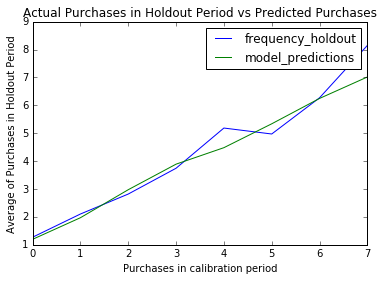

In [46]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

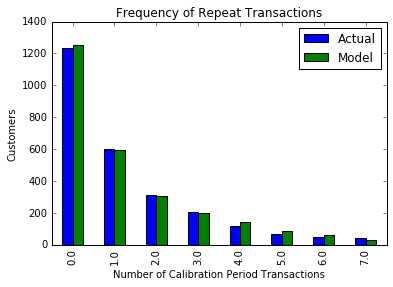

In [47]:
plot_period_transactions(bgf)

## Modified BG/NBD

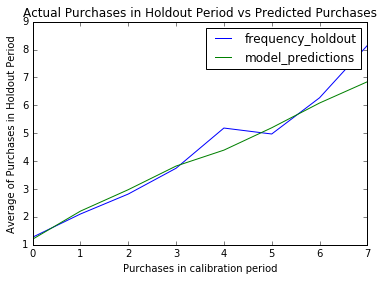

In [48]:
mbgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(mbgf, summary_cal_holdout)

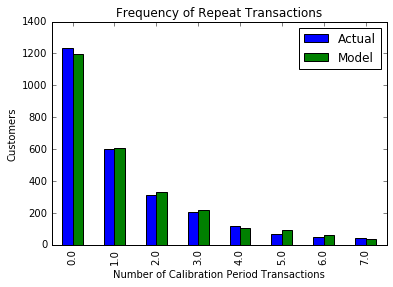

In [49]:
plot_period_transactions(mbgf)

# Estimate CLV

In [ ]:
from lifetimes.datasets import load_summary_data_with_monetary_value

summary_with_money_value = load_summary_data_with_monetary_value()
summary_with_money_value.head()
returning_customers_summary = summary_with_money_value[summary_with_money_value['frequency']>0]

returning_customers_summary.head()

In [54]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [59]:
summary_with_money_value = summary_data_from_transaction_data(data.to_dataframe(),
                                                              'CustomerID', 'InvoiceDate', monetary_value_col='Revenue', 
                                   observation_period_end='2011-12-09', freq='D')


In [60]:
summary_with_money_value

,frequency,recency,T,monetary_value
CustomerID,,,,
17850,2,71,373,1894.645000
13047,13,342,373,208.651538
12583,17,371,373,372.440000
13748,3,278,373,248.083333
15100,5,43,373,56.940000
15291,16,348,373,266.731875
14688,20,366,373,233.120000
17809,11,357,373,417.529091
15311,90,373,373,655.266778


In [61]:
returning_customers_summary = summary_with_money_value[summary_with_money_value['frequency']>0]

In [62]:
returning_customers_summary

,frequency,recency,T,monetary_value
CustomerID,,,,
17850,2,71,373,1894.645000
13047,13,342,373,208.651538
12583,17,371,373,372.440000
13748,3,278,373,248.083333
15100,5,43,373,56.940000
15291,16,348,373,266.731875
14688,20,366,373,233.120000
17809,11,357,373,417.529091
15311,90,373,373,655.266778


In [63]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.198027
frequency,0.198027,1.000000


In [64]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'], 
        returning_customers_summary['monetary_value'])
print ggf    

<lifetimes.GammaGammaFitter: fitted with 2991 subjects, p: 0.53, q: 0.96, v: 1.23>


In [66]:
CLV =  ggf.conditional_expected_average_profit(summary_with_money_value['frequency'],
                                               summary_with_money_value['monetary_value'])

[(0, 1000)]

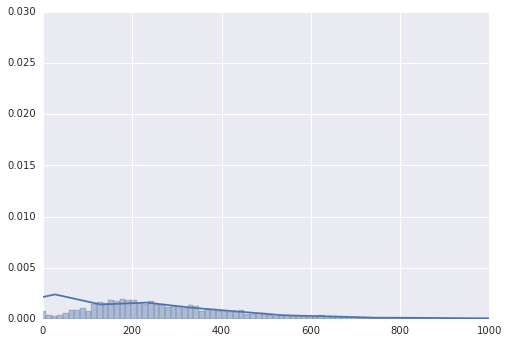

In [82]:
g = sns.distplot(CLV, bins=1000)
g.set(xlim=(0, 1000))

In [85]:
CLV.sort_values(ascending=False)

CustomerID
18102    8892.337435
12415    6896.693893
14646    6084.468368
17450    5809.366680
12435    4171.817573
16684    3849.945433
14088    3595.611887
14096    3586.043715
13868    2909.159463
12557    2898.577134
12798    2792.614274
13555    2772.951804
17511    2703.375943
16532    2516.224326
12931    2390.731577
17396    2372.101482
12433    2327.259639
14156    2271.338459
15769    2256.786426
12438    2185.483846
17404    2176.344535
16333    2150.273807
15838    2112.165338
16182    1981.918170
17850    1970.770114
12939    1960.005059
12753    1953.819029
12678    1946.373411
16986    1939.883361
18139    1929.724914
            ...     
18194     -82.968790
12501     -84.993982
14311     -85.903693
12536     -89.250064
15257     -90.722999
14149     -96.684932
17900    -103.935478
15973    -107.530482
14437    -113.898986
16971    -134.042601
15066    -142.706522
16900    -143.693030
13364    -144.829182
12504    -173.742408
18274    -189.188455
13587    -189.340035
17